In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#data generation x,y
m=100
x=np.random.randn(m)*10#(-1,1)*10
print(x.mean())#close to 0
(x.std())#close to 1*10

-0.2958033084738518


10.334808378002027

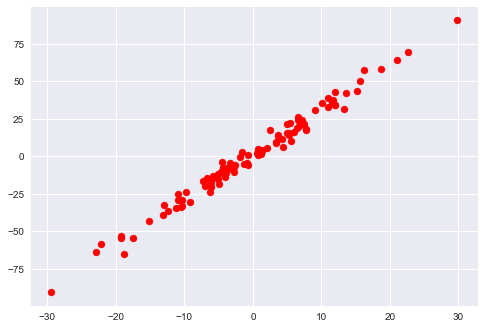

In [52]:
noise =np.random.randn(m)
y=3*x+1+4*noise
plt.style.use('seaborn')
plt.scatter(x,y,color="red")

In [53]:
x.shape
y.shape

(100,)

In [54]:
print(x.mean())
print(x.std())

-0.2958033084738518
10.334808378002027


In [55]:
#normalization
#x-xmean()/x.std()

In [56]:
def normalizedata(x):
    x=(x-x.mean())/x.std()
    return x

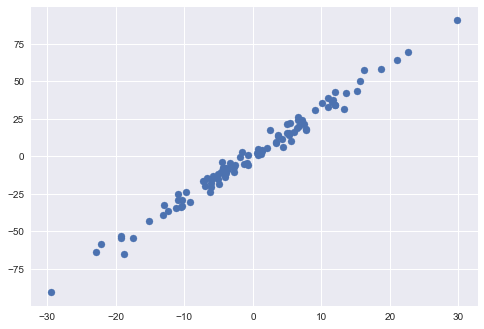

In [57]:
plt.scatter(x,y)

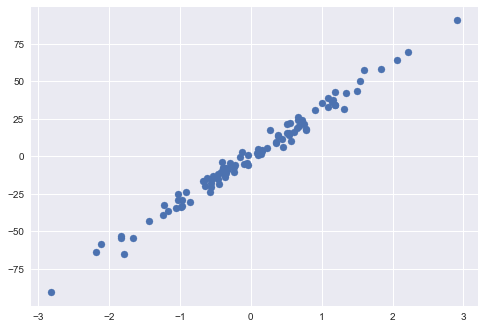

In [99]:
x=normalizedata(x)
plt.scatter(x,y)

In [59]:
x.std()#standard deviation is reduced to 1


0.9999999999999998

In [60]:
def trainTestSplit(x,y,split=0.8):
    m=x.shape[0]
    data=np.zeros((m,2))
    data[:,0]=x
    data[:,1]=y
    np.random.shuffle(data)#this is going to shuffle row by row
    split=int(m*split)
    x_tr=data[:split,0]#0-79
    y_tr=data[:split,1]#0-79
    x_te=data[split:,0]#80-99
    y_te=data[split:,1]#80-99
    return x_tr,y_tr,x_te,y_te

In [61]:
x_tr,y_tr,x_te,y_te=trainTestSplit(x,y)

In [62]:
print(x_tr.shape,y_tr.shape)
print(x_te.shape,y_te.shape)

(80,) (80,)
(20,) (20,)


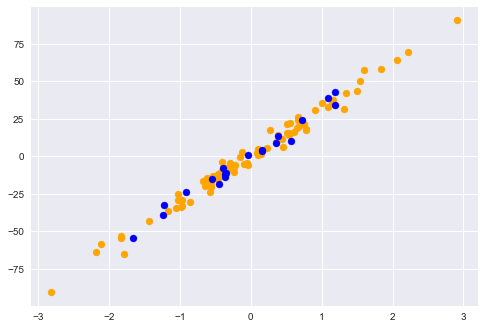

In [63]:
plt.scatter(x_tr, y_tr,color='orange')
plt.scatter(x_te, y_te,color='blue')

In [85]:
#hypothesis function
def hypothesis(x,theta):
    return theta[0]+theta[1]*x
def error(x,y,theta):
    m=x.shape[0]
    e=0
    for i in range(m):
        y_i=hypothesis(x[i],theta)
        e=e+(y[i]-y_i)**2
    return e/(2*m)

def gradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        exp=hypothesis(x[i],theta)-y[i]
        grad[0]+=(exp)
        grad[1]+=(exp)*x[i]
    return grad/m
    
def train(x,y,learning_rate=0.01):
    theta=np.zeros((2,))
    maxitrs=100
    error_list=[] #to check how error is behaving during training
    for i in range(maxitrs):
        grad=gradient(x,y,theta)
        error_list.append(error(x,y,theta))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    plt.plot(error_list)
    return theta

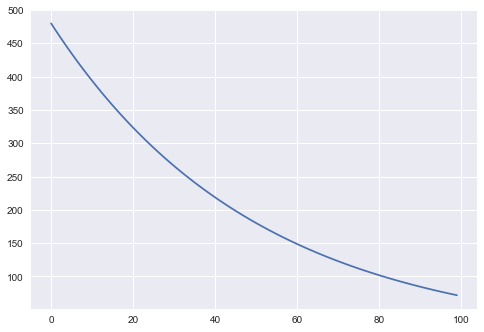

In [86]:
theta=train(x,y)

In [87]:
theta

array([ 0.29162957, 19.4933374 ])

In [88]:
def predict(x,theta):
    return hypothesis(x,theta)


In [94]:
yp=predict(x_te,theta)

In [95]:
yp.shape

(20,)

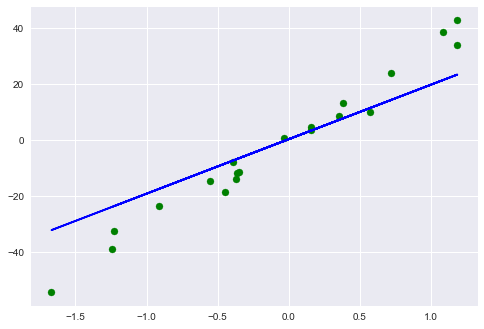

In [98]:
plt.scatter(x_te,y_te,color="green")
plt.plot(x_te,yp,color="blue")

In [101]:
#r2 score
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denom=np.sum((y-ymean)**2)
    return 1-num/denom
r2score(y_te,yp)

0.8425923830300142